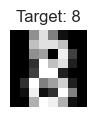

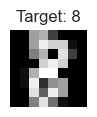

In [2]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd


digits = datasets.load_digits()
#Display an image for debugging
def display_image(n):
    # Display the image with the target (digit) displayed above
    image = digits.images[n]
    target = digits.target[n]
    plt.figure(figsize = (1,1))
    plt.imshow(image, cmap='gray')
    plt.title(f'Target: {target}')
    plt.axis('off')
    plt.show()
display_image(8)
display_image(28)
#Your code here - write an SVC to classify the digits dataset!

In [3]:
X = digits.data
y = digits.target


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)#the data split is performed in a deterministic manner without randomization.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
param_grid = {
    'kernel': ['rbf','linear','poly'], 
    'gamma': [0.0001, 0.001,0.01],
      'C': [0.1,1, 10, 100, 1000],
    }

grid_search = GridSearchCV(
    SVC(), param_grid, scoring='f1_macro'
)
grid_search.fit(X_train, y_train)

#  best parameters
best_params = grid_search.best_params_
best_score= grid_search.best_score_

print("Best Hyperparameters:")
print(best_params)
print("Best Score:")
print(best_score)
results_df = pd.DataFrame(grid_search.cv_results_)
best_model = grid_search.best_estimator_
print("\nBest Model:")
print(best_model)
# Display the DataFrame
print(results_df)

Best Hyperparameters:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score:
0.9551161627467535

Best Model:
SVC(C=10, gamma=0.01)
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.045334      0.001584         0.022903        0.001193     0.1   
1        0.008720      0.000295         0.003802        0.000236     0.1   
2        0.033014      0.000823         0.006955        0.000254     0.1   
3        0.045283      0.002018         0.021594        0.001321     0.1   
4        0.010160      0.001045         0.004636        0.000557     0.1   
5        0.034749      0.002795         0.007793        0.000876     0.1   
6        0.034224      0.000508         0.021918        0.001308     0.1   
7        0.009000      0.000678         0.003784        0.000235     0.1   
8        0.033994      0.000808         0.007011        0.000236     0.1   
9        0.044322      0.001684         0.022533        0.001756       1   
10       0.008639      0.000222   

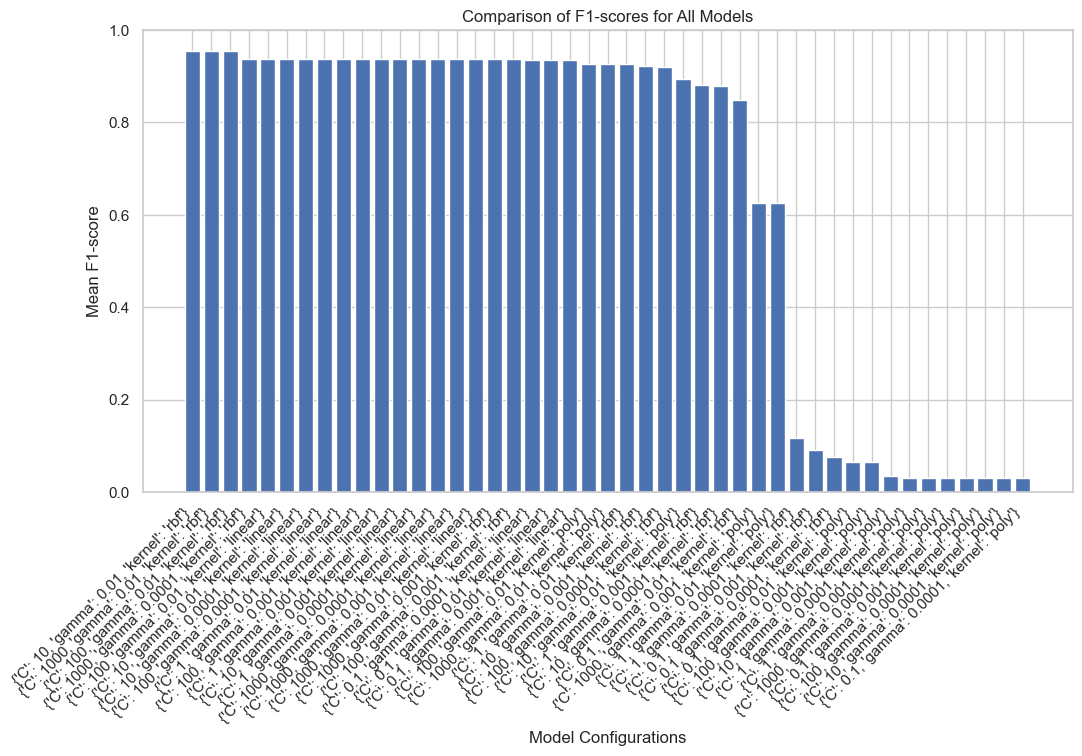

In [6]:
sorted_results_df = results_df.sort_values(by='mean_test_score', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_results_df)), sorted_results_df['mean_test_score'], tick_label=sorted_results_df['params'])
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for F1-score
plt.xlabel('Model Configurations')
plt.ylabel('Mean F1-score')
plt.title('Comparison of F1-scores for All Models')
plt.show()

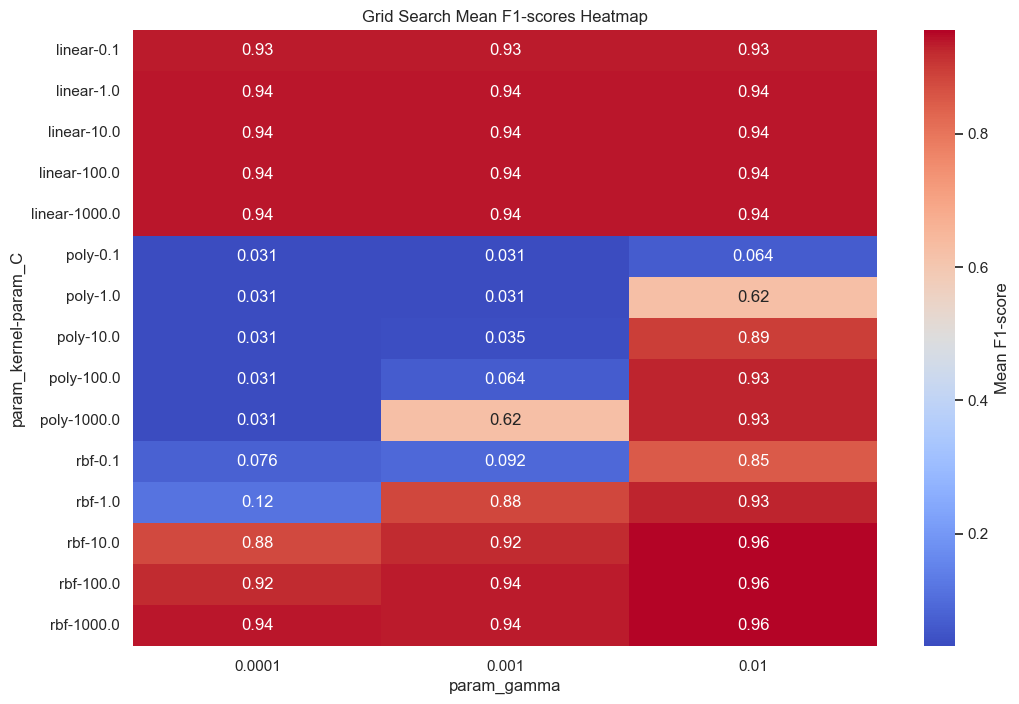

In [9]:
import seaborn as sns
sns.set(style="whitegrid")


heatmap_data = results_df.pivot_table(index=['param_kernel', 'param_C'], columns='param_gamma', values='mean_test_score')
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar_kws={'label': 'Mean F1-score'})
plt.title('Grid Search Mean F1-scores Heatmap')
plt.show()